In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
X_train= pd.read_csv('./X_train_aggregated.csv',  index_col=0)
X_test= pd.read_csv('./X_test_aggregated.csv',  index_col=0)
y_train= pd.read_csv('./y_train_agg.csv')
y_test= pd.read_csv('./y_test_agg.csv')
X_test.fillna(0,inplace=True)

In [131]:
X_train

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV53960,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,378910,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
PRV52517,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,17200,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
PRV55652,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,14010,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
PRV57328,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,17700,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
PRV56721,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,121180,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV52471,12.500000,100.0,12.000000,12.000000,1482.500000,3100,11860,806.250000,1850,6450,...,0.250000,0.125000,0.250000,0.500000,0.750000,0.875000,0.250000,0.375000,0.125000,0.000000
PRV55316,2.923077,100.0,12.000000,12.000000,1804.461538,9920,117290,436.461538,1940,28370,...,0.415385,0.184615,0.230769,0.384615,0.738462,0.846154,0.153846,0.261538,0.061538,0.000000
PRV52671,0.000000,0.0,12.000000,12.000000,2605.000000,4610,5210,500.000000,720,1000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.000000


In [132]:
y_train

,PotentialFraud
0,0
1,0
2,0
3,0
4,0
...,...
4323,0
4324,0
4325,0
4326,0


In [133]:
type(y_train)

pandas.core.frame.DataFrame

In [151]:
def ApplyModel(X, y, model):
    
    model.fit(X, y)
    y_pred  = model.predict(X)

   # Accuracy = round(np.median(cross_val_score(model, X, y, cv = cv)),2)*100
 
   # Error   = 1 - Accuracy
    
    precision = precision_score(y_train, y_pred) * 100
    recall = recall_score(y_train, y_pred) * 100
    f1score = f1_score(y_train, y_pred) * 100
    
    return (model, y_pred, Accuracy, Error, precision, recall, f1score)  

In [149]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [273]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                        random_state = 0,class_weight='balanced'))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)  #criterion = 'gini'

In [257]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [258]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

train MAE: 1.18e-02
train MSE: 1.18e-02
train R2: 0.860
test MAE: 7.49e-02
test MSE: 7.49e-02
test R2: 0.131
Accuracy: 0.9251386321626618


In [259]:
confusion_matrix(y_test, y_test_pred)

array([[950,  29],
       [ 52,  51]])

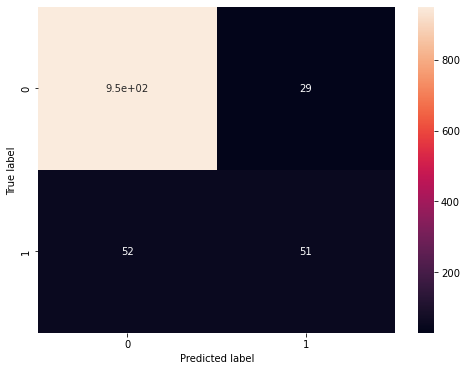

In [260]:

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [242]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus #pip install pydotplus


dot_data = StringIO()
export_graphviz(model.steps[0][1], out_file=dot_data, feature_names=X_train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [274]:
model.steps[0][1].feature_importances_

array([5.09556658e-03, 2.92826007e-03, 4.96445229e-03, 3.81208408e-03,
       1.09019345e-03, 6.79983877e-03, 3.46475315e-02, 1.15217524e-02,
       1.04794271e-02, 8.27316270e-03, 3.76245567e-03, 7.87570165e-03,
       4.07092246e-03, 5.66146180e-03, 0.00000000e+00, 8.10834448e-03,
       1.10365059e-02, 1.30068760e-02, 1.99476687e-02, 1.78008985e-01,
       1.58145613e-02, 2.18168899e-02, 3.62572174e-03, 1.37242995e-02,
       3.95275543e-03, 8.34954679e-03, 8.31644525e-03, 8.74005832e-03,
       1.30695796e-02, 4.62407257e-03, 7.04955724e-03, 5.71654123e-03,
       1.20567472e-02, 5.69790875e-02, 1.17837625e-02, 1.68213680e-02,
       5.48646572e-02, 2.25305571e-03, 4.07982709e-03, 2.68804423e-01,
       2.09754825e-04, 9.65840303e-03, 4.76410892e-03, 1.67705160e-02,
       8.13824028e-03, 1.84402858e-02, 8.96055023e-03, 8.61831100e-03,
       8.22561489e-03, 7.83123227e-03, 6.49005048e-03, 9.56474740e-03,
       6.22874451e-03, 2.56529238e-03])

In [290]:
feat_labels = X_train.columns
importances = model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
res=[]
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    res.append([feat_labels[indices[f]], importances[indices[f]]])
df_importances=pd.DataFrame(res)
threshold = 0.01
list(df_importances[df_importances[1]>threshold ][0])# feature importance > threshold 

['MaxHospitalDays',
 'TotalInscClaimAmtReimbursed',
 'TotalIPAnnualReimbursementAmt',
 'TotalIPAnnualDeductibleAmtdf',
 'OPAnnualReimbursementAmt_sum',
 'MaxInscClaimAmtReimbursed',
 'ClmsperBene',
 'Chronic_Cancer_Frac',
 'MaxIPAnnualReimbursementAmt',
 'Chronic_Heartfailure_Frac',
 'MeanInscClaimAmtReimbursed',
 'ClmsperATPhysn',
 'InClmsPct',
 'uniqBeneCount',
 'MajorCounty',
 'MeanIPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt_mean',
 'Age',
 'OPAnnualDeductibleAmt_max']

In [291]:
df_importances#feature importances

,0,1
0,MaxHospitalDays,0.268804
1,TotalInscClaimAmtReimbursed,0.178009
2,TotalIPAnnualReimbursementAmt,0.056979
3,TotalIPAnnualDeductibleAmtdf,0.054865
4,OPAnnualReimbursementAmt_sum,0.034648
5,MaxInscClaimAmtReimbursed,0.021817
6,ClmsperBene,0.019948
7,Chronic_Cancer_Frac,0.018440
8,MaxIPAnnualReimbursementAmt,0.016821
9,Chronic_Heartfailure_Frac,0.016771


In [292]:
features=['MaxHospitalDays',
 'TotalInscClaimAmtReimbursed',
 'TotalIPAnnualReimbursementAmt',
 'TotalIPAnnualDeductibleAmtdf',
 'OPAnnualReimbursementAmt_sum',
 'MaxInscClaimAmtReimbursed',
 'ClmsperBene',
 'Chronic_Cancer_Frac',
 'MaxIPAnnualReimbursementAmt',
 'Chronic_Heartfailure_Frac',
 'MeanInscClaimAmtReimbursed',
 'ClmsperATPhysn',
 'InClmsPct',
 'uniqBeneCount',
 'MajorCounty',
 'MeanIPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt_mean',
 'Age',
 'OPAnnualDeductibleAmt_max'] 

In [263]:
X_train[features]

,MaxHospitalDays,TotalInscClaimAmtReimbursed,ClaimCounts,OPAnnualReimbursementAmt_sum,MaxInscClaimAmtReimbursed,TotalIPAnnualReimbursementAmt,ClmsperOPPhysn,OPAnnualDeductibleAmt_sum
Provider,,,,,,,,
PRV53960,0.0,127360,420,1377270,3300,1962920,24.705882,378910
PRV52517,0.0,10910,32,66640,3000,138000,16.000000,17200
PRV55652,0.0,6140,28,49210,3200,125080,9.333333,14010
PRV57328,0.0,5360,38,56930,1600,121320,9.500000,17700
PRV56721,0.0,60120,202,410600,3300,1340890,33.666667,121180
...,...,...,...,...,...,...,...,...
PRV52471,0.0,1640,8,11860,700,8000,4.000000,6450
PRV55316,0.0,15490,65,117290,3300,166950,32.500000,28370
PRV52671,0.0,240,2,5210,200,3000,-99.000000,1000


In [194]:
steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'gini', random_state = 0))]
model = Pipeline(steps)
model = model.fit(X_train[features],y_train)
y_train_pred = model.predict(X_train[features])
y_test_pred = model.predict(X_test[features])
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.43e-02
train MSE: 1.43e-02
train R2: 0.830
test MAE: 6.84e-02
test MSE: 6.84e-02
test R2: 0.206


# SVM

In [255]:
from sklearn import svm
svn = svm.SVC()    
svn.fit(X_train, y_train)    
predictions = svn.predict(X_test)    
print(accuracy_score(y_test, y_test_pred))    
print(confusion_matrix(y_test, y_test_pred))    
print(classification_report(y_test, y_test_pred)) 

0.9232902033271719
[[947  32]
 [ 51  52]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       979
           1       0.62      0.50      0.56       103

    accuracy                           0.92      1082
   macro avg       0.78      0.74      0.76      1082
weighted avg       0.92      0.92      0.92      1082

